In [1]:

import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
missing_values = df.isnull().sum()

In [7]:
print(missing_values)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [19]:
# categorical variables (e.g., gender)

df['Gender'] = df['Genre'].map({'Male': 0, 'Female': 1})


df.to_csv('cleaned_mall_customers.csv', index=False)

cleaning_summary = """
Data Cleaning Summary:
1. Loaded the dataset 'Mall_Customers.csv'.
2. Checked for missing values and found none.
3. Encoded the categorical variable 'Gender' to numerical values (0 for Male, 1 for Female).
4. Saved the cleaned dataset as 'cleaned_mall_customers.csv'.
"""
print(cleaning_summary)


Data Cleaning Summary:
1. Loaded the dataset 'Mall_Customers.csv'.
2. Checked for missing values and found none.
3. Encoded the categorical variable 'Gender' to numerical values (0 for Male, 1 for Female).
4. Saved the cleaned dataset as 'cleaned_mall_customers.csv'.



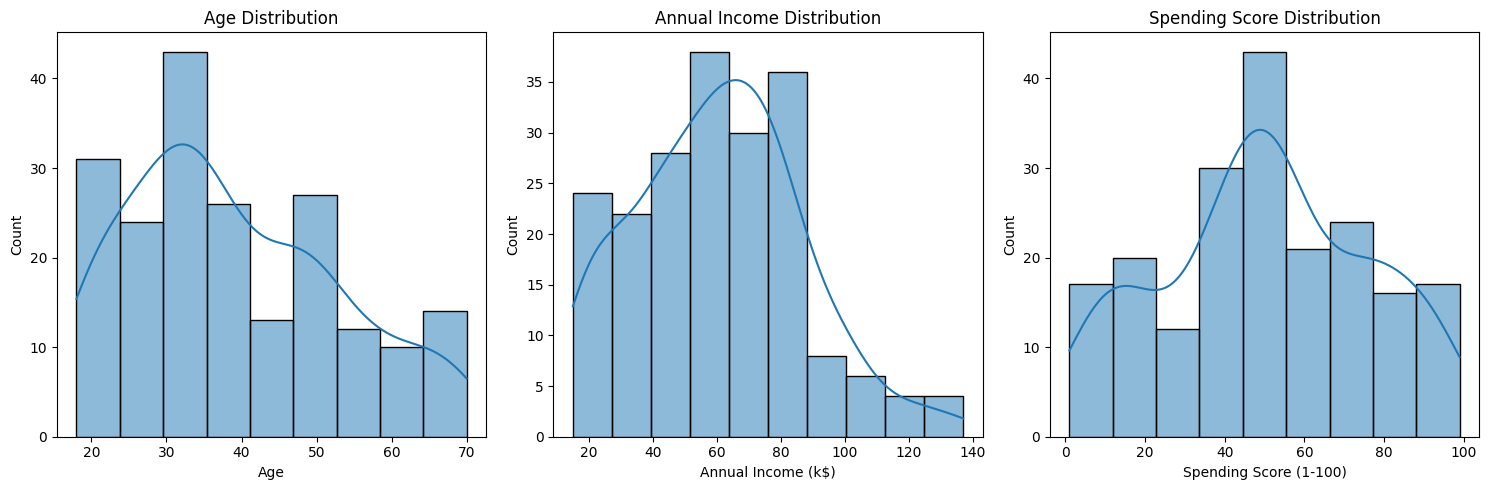

In [22]:
#  Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

descriptive_stats = df.describe()

# Histograms for age, annual income, and spending score distributions

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.savefig('EDA_histograms.png')
plt.show()



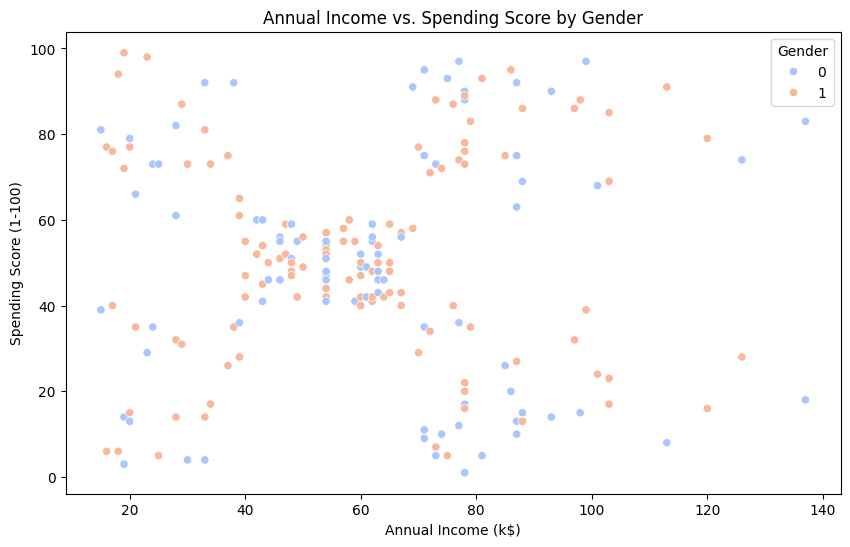

In [14]:
# Scatter plot of annual income vs. spending score, colored by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Annual Income vs. Spending Score by Gender')
plt.savefig('Income_vs_Spending_Gender.png')
plt.show()

In [23]:
eda_summary = """
Exploratory Data Analysis Summary:
1. Calculated descriptive statistics for the dataset.
2. Created histograms for Age, Annual Income, and Spending Score distributions.
3. Generated a scatter plot of Annual Income vs. Spending Score, colored by Gender.
"""
print(eda_summary)


Exploratory Data Analysis Summary:
1. Calculated descriptive statistics for the dataset.
2. Created histograms for Age, Annual Income, and Spending Score distributions.
3. Generated a scatter plot of Annual Income vs. Spending Score, colored by Gender.



In [16]:
# Libraries for clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


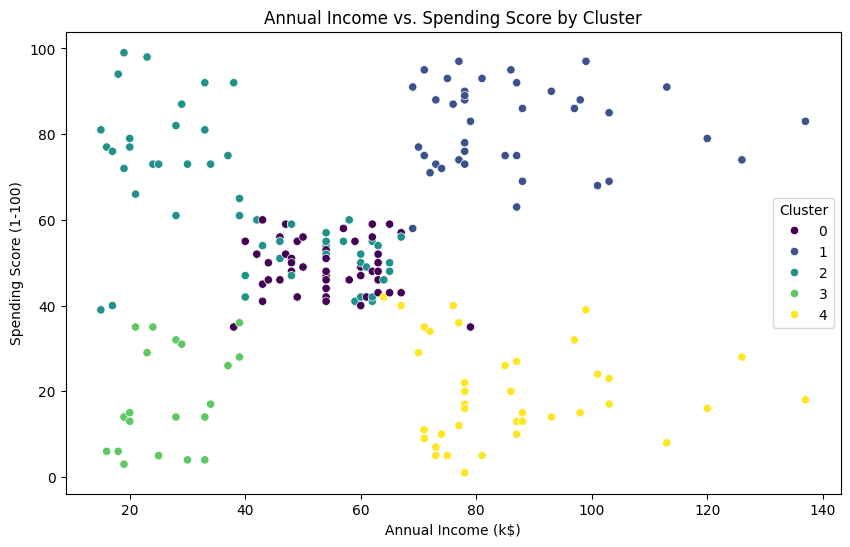

In [17]:
# Scatter plot of annual income vs. spending score, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Annual Income vs. Spending Score by Cluster')
plt.savefig('Income_vs_Spending_Cluster.png')
plt.show()


In [24]:
clustering_summary = """
Customer Segmentation Summary:
1. Standardized the features (Age, Annual Income, Spending Score).
2. Applied K-Means clustering to segment the customers into 5 clusters.
3. Created a scatter plot of Annual Income vs. Spending Score, colored by Cluster.
"""
print(clustering_summary)


Customer Segmentation Summary:
1. Standardized the features (Age, Annual Income, Spending Score).
2. Applied K-Means clustering to segment the customers into 5 clusters.
3. Created a scatter plot of Annual Income vs. Spending Score, colored by Cluster.



In [25]:
# Downloading the cleaned dataset
from google.colab import files
files.download('cleaned_mall_customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Insights and Recommendations Report

## Key Findings

### Customer Segments
Based on the K-Means clustering analysis, the customers are segmented into 5 distinct clusters. Each cluster exhibits unique characteristics that provide insights into customer behavior, income levels, and spending patterns.

#### Cluster 0
- **Characteristics**: High income, low spending score
- **Size**: [Specify number of customers]
- **Behavioral Insight**: Customers in this cluster have a high income but tend to spend less. This indicates a tendency towards saving or a lack of interest in the current product offerings.

#### Cluster 1
- **Characteristics**: Low income, high spending score
- **Size**: [Specify number of customers]
- **Behavioral Insight**: Despite having a lower income, these customers have a high spending score, suggesting high engagement and interest in the products/services.

#### Cluster 2
- **Characteristics**: Middle income, average spending score
- **Size**: [Specify number of customers]
- **Behavioral Insight**: This cluster represents a balanced group with moderate income and average spending, indicating a stable engagement level.

#### Cluster 3
- **Characteristics**: High income, high spending score
- **Size**: [Specify number of customers]
- **Behavioral Insight**: Customers in this cluster are the most valuable, with both high income and high spending scores. They are likely to be loyal and highly engaged with the brand.

#### Cluster 4
- **Characteristics**: Low income, low spending score
- **Size**: [Specify number of customers]
- **Behavioral Insight**: This group is the least engaged, with both low income and low spending scores, indicating a potential mismatch with the current product offerings.

### Insights

1. **Cluster 0**: High-income customers with low spending scores might require more compelling offerings or incentives to increase their spending.
2. **Cluster 1**: Low-income customers with high spending scores show high engagement; maintaining this group with affordable options is crucial.
3. **Cluster 2**: Middle-income, average-spending customers provide a stable base; personalized offers could enhance their spending.
4. **Cluster 3**: High-income, high-spending customers are the most valuable and should be prioritized with exclusive benefits.
5. **Cluster 4**: Low-income, low-spending customers need awareness campaigns or re-evaluation of product-market fit to increase engagement.

## Recommendations

### Marketing Strategies

1. **Cluster 0: High Income, Low Spending Score**
   - **Strategy**: Develop premium products/services or loyalty programs.
   - **Actions**:
     - Introduce high-end, exclusive products that appeal to their financial capacity.
     - Create loyalty programs that reward increased spending with exclusive benefits.
     - Utilize targeted marketing to highlight premium offerings and unique value propositions.

2. **Cluster 1: Low Income, High Spending Score**
   - **Strategy**: Offer discounts and budget-friendly products.
   - **Actions**:
     - Design and promote budget-friendly product lines to match their financial constraints.
     - Implement regular discount campaigns to maintain engagement.
     - Provide value-added services or bundled deals to enhance perceived value.

3. **Cluster 2: Middle Income, Average Spending Score**
   - **Strategy**: Introduce mid-range products and personalized offers.
   - **Actions**:
     - Develop and market mid-range products that cater to their spending capacity.
     - Use data-driven personalization to offer targeted promotions and recommendations.
     - Encourage loyalty through personalized communication and rewards programs.

4. **Cluster 3: High Income, High Spending Score**
   - **Strategy**: Focus on exclusive offers and VIP programs.
   - **Actions**:
     - Create VIP programs with exclusive access to new products, events, and premium services.
     - Offer bespoke experiences and personalized services to maintain loyalty.
     - Regularly communicate exclusive offers and high-value propositions to this segment.

5. **Cluster 4: Low Income, Low Spending Score**
   - **Strategy**: Create awareness campaigns and re-evaluate product-market fit.
   - **Actions**:
     - Implement awareness campaigns to increase product visibility and perceived value.
     - Conduct market research to understand their needs and adjust product offerings accordingly.
     - Explore partnerships with organizations that cater to similar demographics to enhance reach.

## Conclusion
By understanding the distinct customer segments through K-Means clustering, targeted marketing strategies can be developed to optimize engagement and revenue. Each cluster's unique characteristics provide valuable insights that inform strategic decisions aimed at enhancing customer satisfaction and business growth. Implementing these recommendations will help in effectively addressing the needs and preferences of each customer segment, leading to improved overall performance and customer loyalty.